In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales.csv')

In [3]:
#checking whether data was loaded in successfully
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Exploring data to get the general outlook

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.shape

(1000, 17)

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [7]:
#checking whether we have missing values in the data
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
#so it looks like we have no missing data 
#let us check whether we have duplicates
df.duplicated().sum()
print(f"we got {df.duplicated().sum()} duplicated data")

we got 0 duplicated data


# EDA

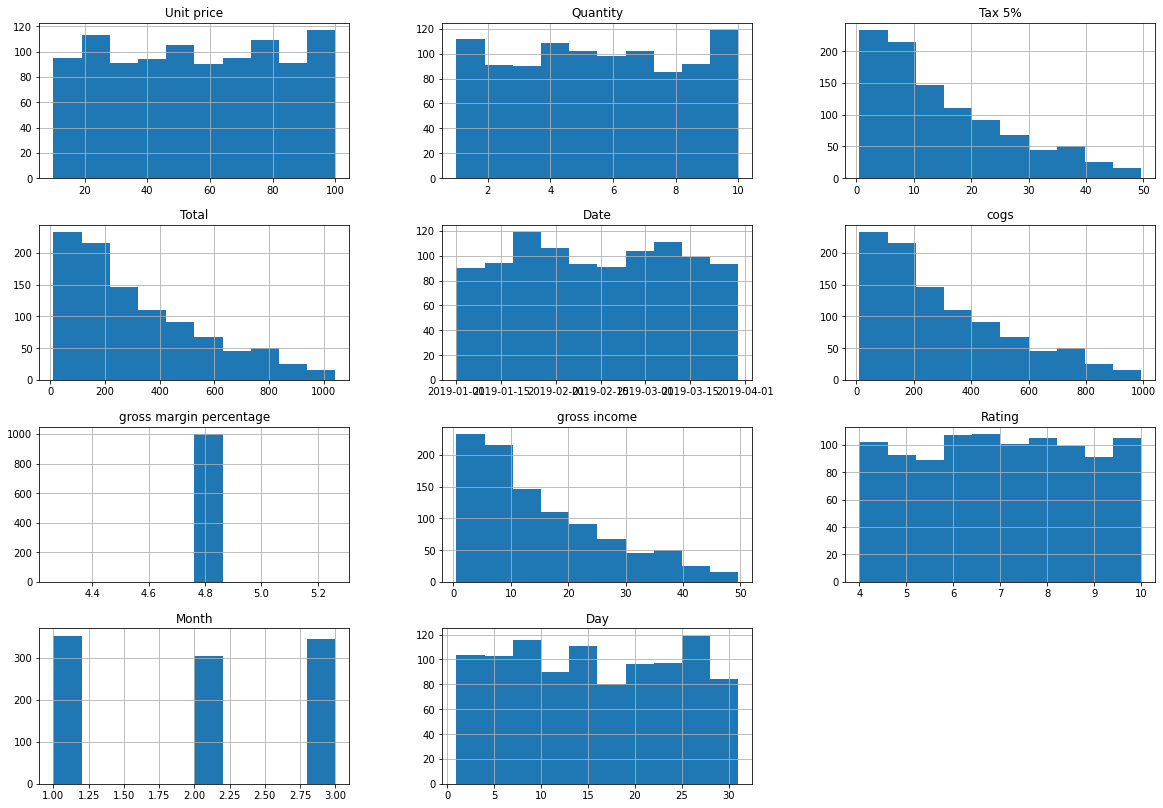

In [29]:
#looking at histogram representation of the data
df.hist(figsize=(20, 14))
plt.show()

<AxesSubplot:>

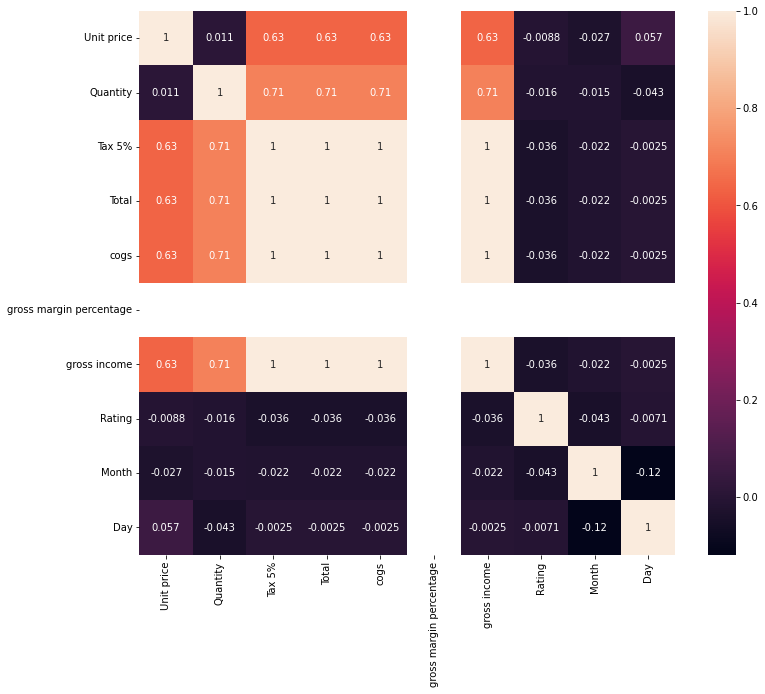

In [38]:
#heatmap representation of data
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

In [10]:
#from the general overview of the data, we can see we have different cities and branches.
#let's explore them
df.Branch.unique()

array(['A', 'C', 'B'], dtype=object)

In [11]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [12]:
df['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [13]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [14]:
#let us check the products sold
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [15]:
#let us look at the total monthly sales for each branch 
#we first need to change the 'date' format to
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df['Month'] = df.Date.dt.month
df['Day'] = df.Date.dt.day

In [17]:
#monthly sales for each branch
df.groupby(['Month', 'Branch'])['Total'].sum().to_frame()

Total
Month Branch            
1     A       38681.1285
      B       37176.0585
      C       40434.6810
2     A       29860.1205
      B       34424.2710
      C       32934.9825
3     A       37659.1215
      B       34597.3425
      C       37199.0430

In [18]:
#monthly tax and gross income per branch
df.groupby(['Month', 'Branch'])['Tax 5%', 'gross income'].sum()

C:\Users\hp\AppData\Local\Temp/ipykernel_10236/2287071753.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Month', 'Branch'])['Tax 5%', 'gross income'].sum()


Tax 5%  gross income
Month Branch                         
1     A       1841.9585     1841.9585
      B       1770.2885     1770.2885
      C       1925.4610     1925.4610
2     A       1421.9105     1421.9105
      B       1639.2510     1639.2510
      C       1568.3325     1568.3325
3     A       1793.2915     1793.2915
      B       1647.4925     1647.4925
      C       1771.3830     1771.3830

In [19]:
#looking at daily sales and gross income 
df.groupby('Day')['Total', 'gross income'].sum().sort_values(by='gross income', ascending=False)

C:\Users\hp\AppData\Local\Temp/ipykernel_10236/2762921181.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Day')['Total', 'gross income'].sum().sort_values(by='gross income', ascending=False)


,Total,gross income
Day,,
15,15717.4605,748.4505
19,14883.2355,708.7255
9,13767.2850,655.5850
14,13635.3420,649.3020
8,13503.7770,643.0370
27,13398.1680,638.0080
5,12798.6915,609.4615
2,12646.7565,602.2265
23,12428.8185,591.8485


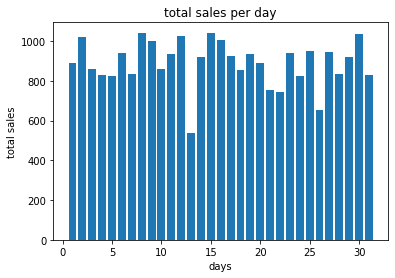

In [20]:
#a graph showing the total sales per day
Day = df['Day']
Total = df['Total']
plt.title('total sales per day')
plt.xlabel('days')
plt.ylabel('total sales')
plt.bar(Day, Total)
plt.show()

In [22]:
#looking at total monthly sales, tax and gross income per branch
df.groupby(['Day', 'Branch'])['Total', 'Tax 5%', 'gross income'].sum()


C:\Users\hp\AppData\Local\Temp/ipykernel_10236/3310654891.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Day', 'Branch'])['Total', 'Tax 5%', 'gross income'].sum()


Total    Tax 5%  gross income
Day Branch                                   
1   A       3927.4725  187.0225      187.0225
    B       2470.0095  117.6195      117.6195
    C       3426.6015  163.1715      163.1715
2   A       1968.4665   93.7365       93.7365
    B       6344.3415  302.1115      302.1115
...               ...       ...           ...
30  B       2180.1150  103.8150      103.8150
    C       3249.1830  154.7230      154.7230
31  A        588.1575   28.0075       28.0075
    B       2782.2795  132.4895      132.4895
    C       1862.0595   88.6695       88.6695

[93 rows x 3 columns]

In [23]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8


In [24]:
#modes of payment and frequency of usage
df['Payment'].value_counts()


Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [25]:
#let us look at the product which generates most revenue to the store
df.groupby(['Product line'])['gross income'].sum().sort_values(ascending=False).to_frame()

,gross income
Product line,
Food and beverages,2673.5640
Sports and travel,2624.8965
Electronic accessories,2587.5015
Fashion accessories,2585.9950
Home and lifestyle,2564.8530
Health and beauty,2342.5590


In [26]:
#looking at products each gender prefer most
df.groupby(['Product line','Gender'])['Gender'].count().to_frame()


Gender
Product line           Gender        
Electronic accessories Female      84
                       Male        86
Fashion accessories    Female      96
                       Male        82
Food and beverages     Female      90
                       Male        84
Health and beauty      Female      64
                       Male        88
Home and lifestyle     Female      79
                       Male        81
Sports and travel      Female      88
                       Male        78